In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyam

from pathlib import Path
from pandas_indexing import ismatch

C:\Users\gidden\AppData\Local\Temp\ipykernel_10656\1867457424.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\gidden\Miniconda3\envs\pyam\Lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
data_path = Path('../processed_data/')
ar6_path = Path('../raw_data/')

In [3]:
cdf = pd.read_csv(data_path / '../processed_data/102_ccs_data_r5_r10.csv', index_col=list(range(5))).rename(columns={'2100': 'End of Century'})
zdf = pd.read_csv(data_path / '102_netzero_ccs_data_r5_r10.csv', index_col=list(range(5))).rename(columns={'-2': 'Net Zero GHGs', '-1': 'Net Zero CO2'})
mdf = pd.read_excel(ar6_path / 'AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx', sheet_name='meta', index_col=list(range(2)))

In [45]:
limits = pd.read_csv(data_path / '101_D2_compiled_r5_r10.csv', index_col=0)
limits.head()

,Absolute storage loss (net vs gross),Percentage lost (net vs gross),Total storage loss - Geogaphical exclusion zones,Total storage loss - policy exclusion zones,Net total storage,Gross total storage
Region,,,,,,
R5ASIA,270.76,0.401887,223.95,46.81,181.93,452.69
R5LAM,226.61,0.479679,158.15,68.46,208.91,435.52
R5MAF,316.46,0.553552,167.55,148.91,392.38,708.84
R5OECD90+EU,575.53,0.432226,370.87,204.66,438.13,1013.66
R5REF,350.09,0.479141,84.61,265.48,322.05,672.14


# Global Exceedance

In [4]:
data = (
    pd.concat((cdf['End of Century'], zdf[['Net Zero GHGs', 'Net Zero CO2']]), axis=1)
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
data.head()

End of Century  \
Model       Scenario Region Variable                            Unit                        
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr       2408.1906   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr     143287.6073   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr        339.1802   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr      17266.4441   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr       1309.5413   

                                                                           Net Zero GHGs  \
Model       Scenario Region Variable                            Unit                       
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr            NaN   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr            NaN   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr            NaN   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr            NaN   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr            NaN   

                                                                           Net Zero CO2  \
Model       Scenario Region Variable                            Unit                      
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr    2542.04550   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr  118603.35425   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr     352.64760   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr   13814.03880   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr    1265.80840   

                                                                          Category  \
Model       Scenario Region Variable                            Unit                 
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr       C3   

                                                                                             Category_name  \
Model       Scenario Region Variable                            Unit                                         
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr  C3: limit warming to 2°C (>67%)   

                                                                          Category_subset  \
Model       Scenario Region Variable                            Unit                        
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr     C3y_+veGHGs   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr     C3y_+veGHGs   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr     C3y_+veGHGs   

                                                                                                         Subset_Ch

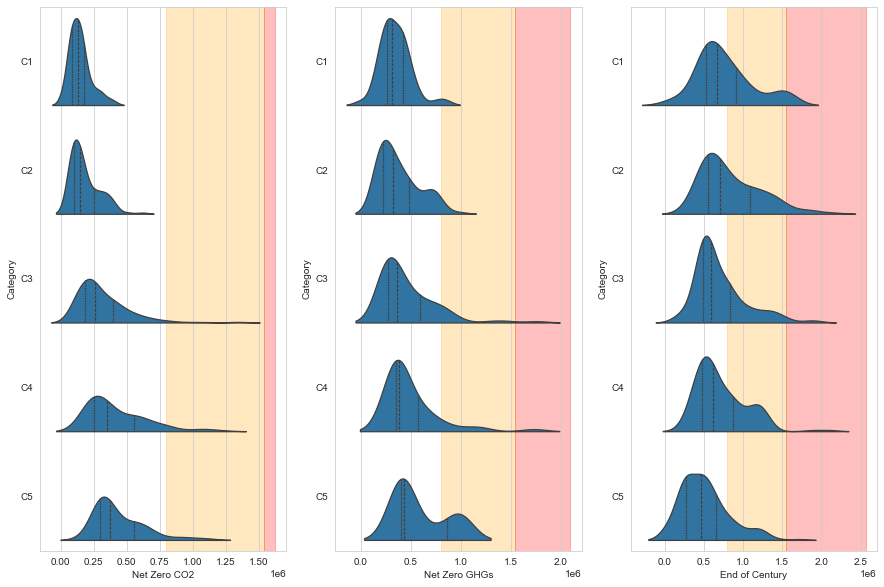

In [46]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

variables = ['Net Zero CO2', 'Net Zero GHGs', 'End of Century']
cats = ['C1', 'C2', 'C3', 'C4', 'C5']
limit = limits.loc['World', 'Net total storage'] * 1e3
for variable, ax in zip(variables, axs):
    sns.violinplot(
        data=data.loc[ismatch(Region='World', Variable='Cumulative Carbon Sequestration|CCS')].where(data.Category.isin(cats)),
        x=variable,
        y='Category',
        order=cats,
        inner='quart',
        split=True,
        ax=ax,
        )

    ax.axvspan(0.8e6, limit, color='orange', alpha=0.25, zorder=0)
    xmax = ax.get_xlim()[1]
    if xmax > limit:
        ax.axvspan(limit, xmax, color='red', alpha=0.25, zorder=0)


In [47]:
mdata = data.melt(id_vars=['Category'], value_vars=['Net Zero CO2', 'End of Century'], ignore_index=False)
mdata = mdata.where(mdata.Category.isin(cats))
mdata.head()

Category  \
Model       Scenario Region Variable                            Unit                 
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr       C3   

                                                                               variable  \
Model       Scenario Region Variable                            Unit                      
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr  Net Zero CO2   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr  Net Zero CO2   
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr  Net Zero CO2   
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr  Net Zero CO2   
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr  Net Zero CO2   

                                                                                  value  
Model       Scenario Region Variable                            Unit                     
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS            Mt CO2/yr    2542.04550  
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr  118603.35425  
                     R5LAM  Carbon Sequestration|CCS            Mt CO2/yr     352.64760  
                            Cumulative Carbon Sequestration|CCS Mt CO2/yr   13814.03880  
                     R5MAF  Carbon Sequestration|CCS            Mt CO2/yr    1265.80840

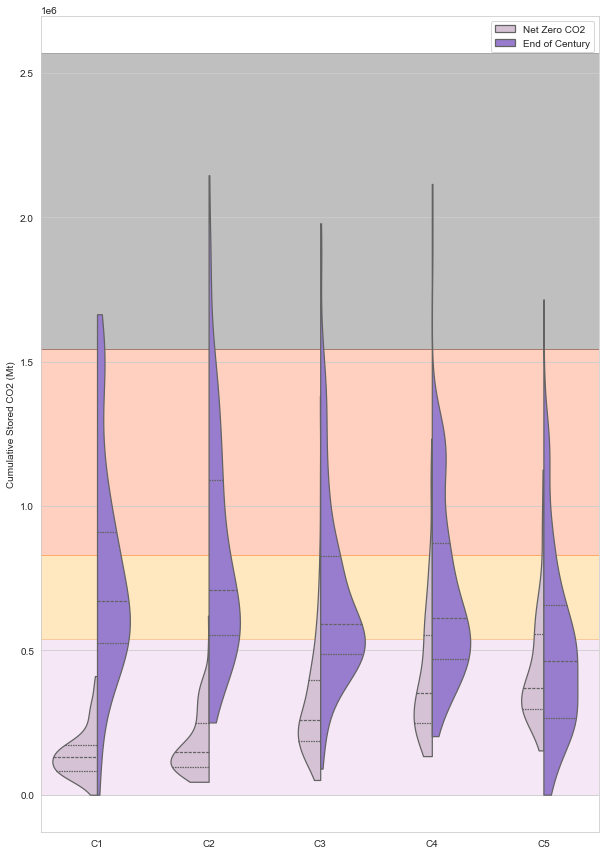

In [68]:

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 15))

palette = {
    'Net Zero CO2': 'thistle', 
    'End of Century': 'mediumpurple',
}

sns.violinplot(
        data=mdata.loc[ismatch(Region='World', Variable='Cumulative Carbon Sequestration|CCS')].reset_index(drop=True),
        y='value',
        hue='variable',
        x='Category',
        order=cats,
        inner='quart',
        split=True,
        cut=0,
        ax=ax,
        palette=palette,
        )

limit = limits.loc['World', 'Net total storage'] * 1e3
ax.axhspan(0, 0.54e6, color='plum', alpha=0.25, zorder=0)
ax.axhspan(0.54e6, 0.83e6, color='orange', alpha=0.25, zorder=0)
ax.axhspan(0.83e6, limit, color='orangered', alpha=0.25, zorder=0)
ax.axhspan(limit, xmax, color='black', alpha=0.25, zorder=0)
ax.legend(loc='upper right')
ax.set_ylabel('Cumulative Stored CO2 (Mt)')
ax.set_xlabel('')

fig.savefig('./figure_3b.pdf', bbox_inches='tight', dpi=1e3)

# Years until boundary is reached

In [123]:
ydf = cdf.loc[ismatch(Variable='Cumulative Carbon Sequestration|CCS', Region='World')].rename(columns={'End of Century': '2100'})
ydf.columns = ydf.columns.astype(int)
ydf[list(range(2101, 2301))] = np.nan
extrap_ydf = ydf.interpolate(method="slinear", fill_value="extrapolate", limit_direction="both", axis=1)
extrap_ydf.head()

C:\Users\gidden\AppData\Local\Temp\ipykernel_10656\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ydf[list(range(2101, 2301))] = np.nan
C:\Users\gidden\AppData\Local\Temp\ipykernel_10656\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ydf[list(range(2101, 2301))] = np.nan
C:\Users\gidden\AppData\Local\Temp\ipykernel_10656\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

1990  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         1995  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2000  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2005  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2010  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2011  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

         

In [127]:
limit = limits.loc['World', 'Net total storage'] * 1e3
year_exceedance = (extrap_ydf > limit).idxmax(axis=1)
year_exceedance[year_exceedance == 1990] = np.nan
year_exceedance.head()


Model        Scenario                Region  Variable                             Unit     
AIM/CGE 2.0  ADVANCE_2020_1.5C-2100  World   Cumulative Carbon Sequestration|CCS  Mt CO2/yr    2122.0
             ADVANCE_2020_Med2C      World   Cumulative Carbon Sequestration|CCS  Mt CO2/yr    2115.0
             ADVANCE_2020_WB2C       World   Cumulative Carbon Sequestration|CCS  Mt CO2/yr    2120.0
             ADVANCE_2030_Med2C      World   Cumulative Carbon Sequestration|CCS  Mt CO2/yr    2117.0
             ADVANCE_2030_Price1.5C  World   Cumulative Carbon Sequestration|CCS  Mt CO2/yr    2136.0
dtype: float64

In [128]:
ydata = (
    year_exceedance.to_frame(name='Exceedance Year')
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
ydata.head()

Exceedance Year  \
Model       Scenario Region Variable                            Unit                         
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2219.0   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              NaN   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              NaN   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2127.0   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2163.0   

                                                                          Category  \
Model       Scenario Region Variable                            Unit                 
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C6   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C5   

                                                                                               Category_name  \
Model       Scenario Region Variable                            Unit                                           
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C3: limit warming to 2°C (>67%)   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  C5: limit warming to 2.5°C (>50%)   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C6: limit warming to 3°C (>50%)   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C3: limit warming to 2°C (>67%)   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  C5: limit warming to 2.5°C (>50%)   

                                                                          Category_subset  \
Model       Scenario Region Variable                            Unit                        
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C6   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C5   

                                                                                                         Subset_Ch4  \
Model       Scenario Region Variable                            Unit                                                  
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  Limit to 2C (>67%) immediate 2020 action   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  Limit to 2C (>67%) immediate 2020 action   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   

                                                                          Category_Vetting_historical  \
Model       Scenario Region Variable                            Unit                                    
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C3   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C6   
            SSP4-

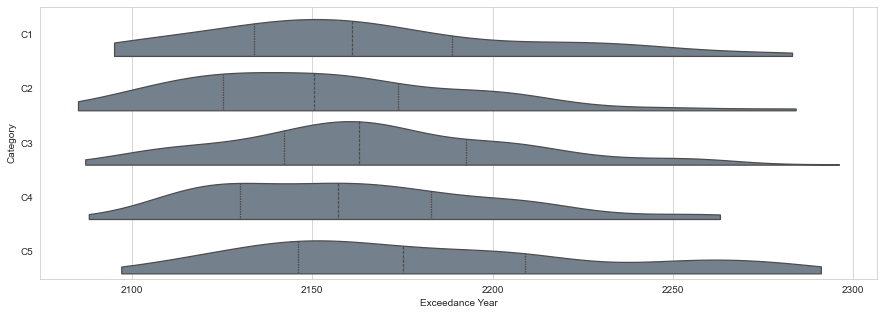

In [136]:
# TODO: add fraction of scenarios in category in this dataset

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(
        data=ydata.reset_index(drop=True),
        x='Exceedance Year',
        y='Category',
        order=cats,
        inner='quart',
        split=True,
        cut=0,
        ax=ax,
        color='slategrey'
        )

fig.savefig('./figure_3c.pdf', bbox_inches='tight', dpi=1e3)

# Regional Exceedance

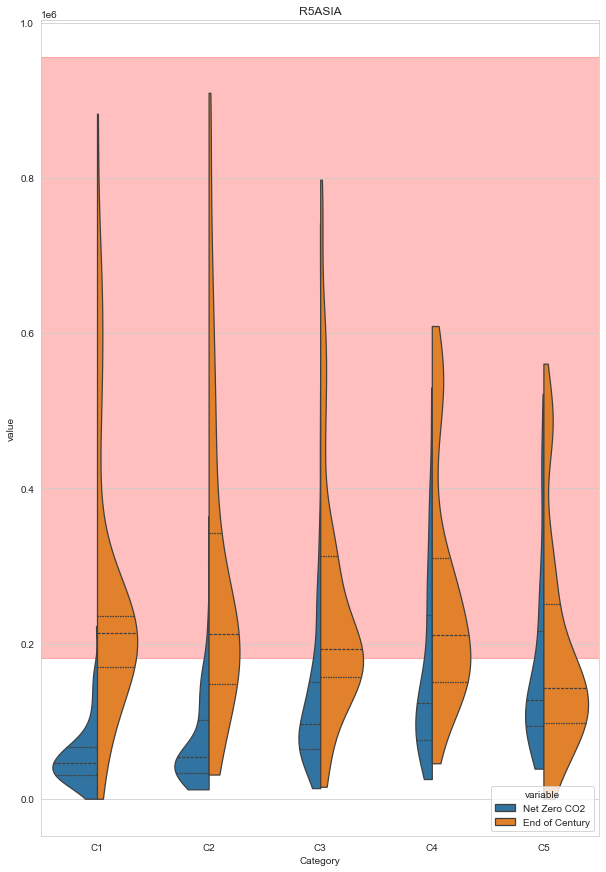

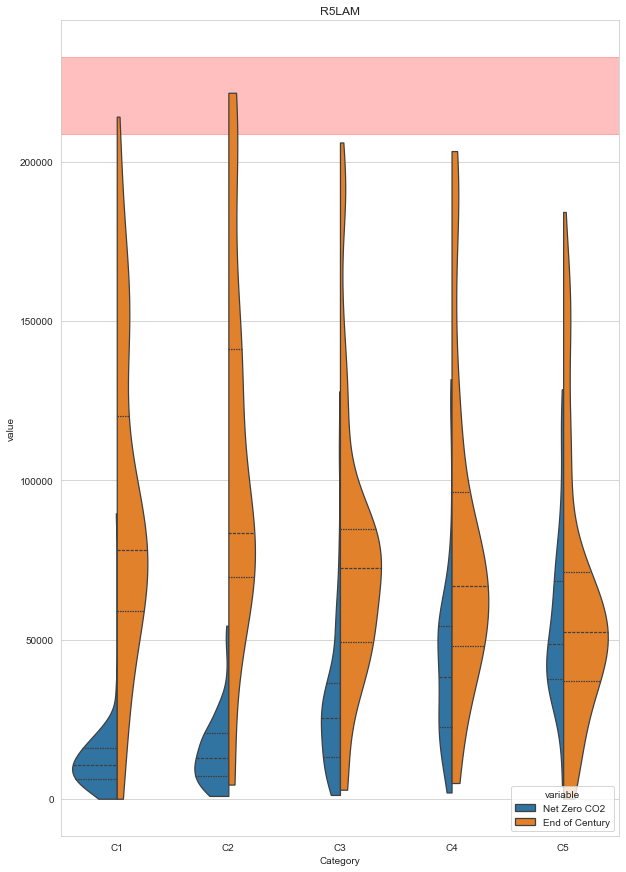

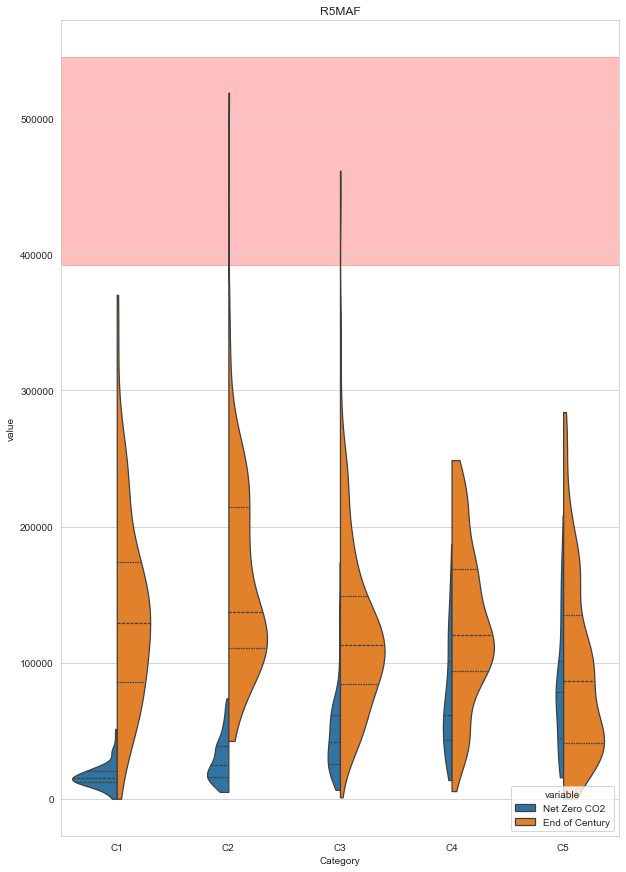

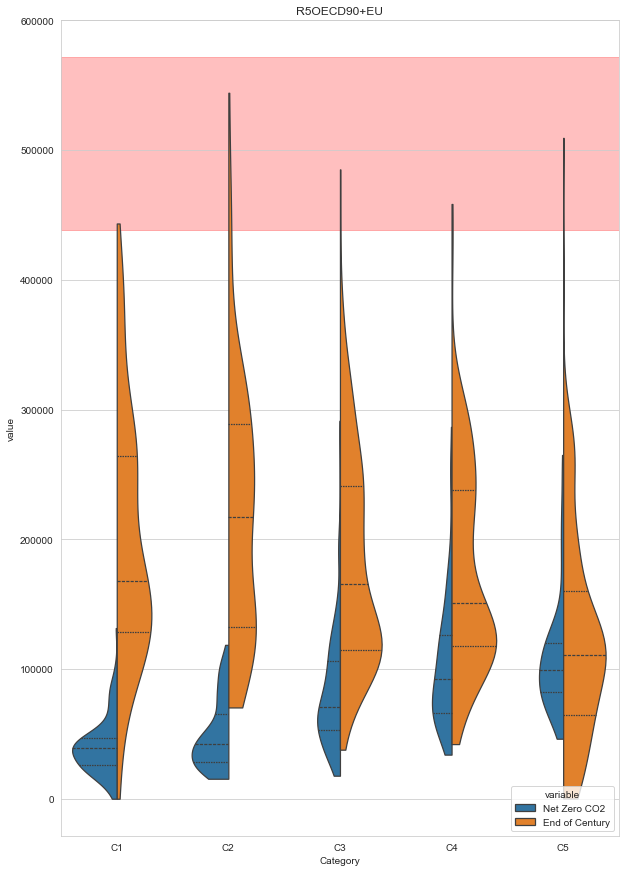

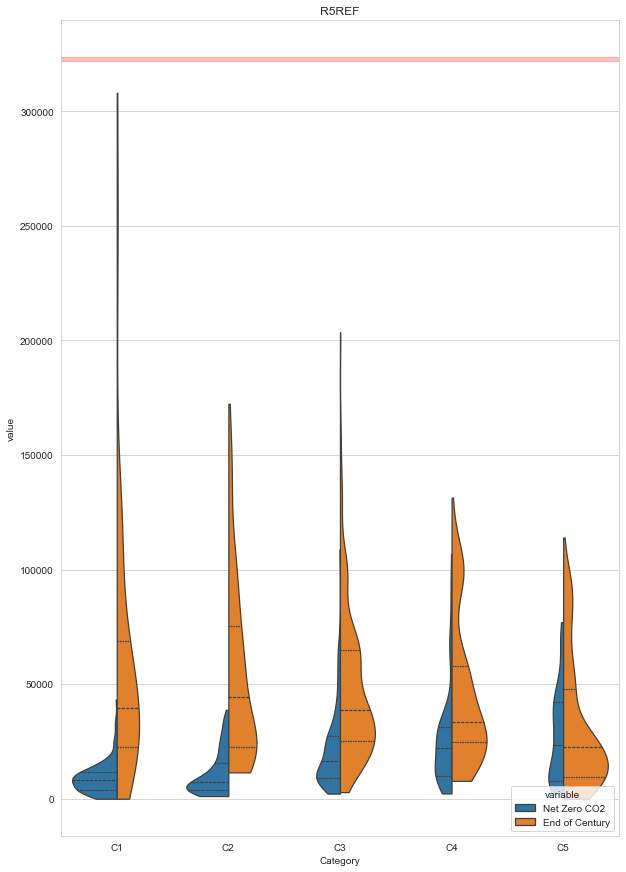

In [55]:
regions = limits.pix.unique('Region')[limits.pix.unique('Region').str.startswith('R5')]

for region in regions:
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 15))

    sns.violinplot(
            data=mdata.loc[ismatch(Region=region, Variable='Cumulative Carbon Sequestration|CCS')].reset_index(drop=True),
            y='value',
            hue='variable',
            x='Category',
            order=cats,
            inner='quart',
            split=True,
            cut=0,
            ax=ax,
            )

    limit = limits.loc[region, 'Net total storage'] * 1e3
    ax.set_title(region)
    ax.axhspan(limit, ax.get_ylim()[1], color='red', alpha=0.25, zorder=0)